In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pwd

/content


In [3]:
import zipfile

zip_ref = zipfile.ZipFile("drive/My Drive/Stanford_Dogs.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [4]:
!pip install split-folders

In [5]:
import splitfolders
splitfolders.ratio('/content/images/Images', output="output", seed=1337, ratio=(0.7, 0,0.3))

Copying files: 20580 files [00:06, 3340.70 files/s]


In [6]:
import os

# Walk through  directory and list number of files
print("TRAIN---")
for dirpath, dirnames, filenames in os.walk("/content/output/train"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
print("TEST---")
for dirpath, dirnames, filenames in os.walk("/content/output/test"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

TRAIN---
There are 120 directories and 0 images in '/content/output/train'.
There are 0 directories and 105 images in '/content/output/train/n02108089-boxer'.
There are 0 directories and 122 images in '/content/output/train/n02088238-basset'.
There are 0 directories and 107 images in '/content/output/train/n02101006-Gordon_setter'.
There are 0 directories and 141 images in '/content/output/train/n02095889-Sealyham_terrier'.
There are 0 directories and 120 images in '/content/output/train/n02093754-Border_terrier'.
There are 0 directories and 105 images in '/content/output/train/n02104029-kuvasz'.
There are 0 directories and 109 images in '/content/output/train/n02115641-dingo'.
There are 0 directories and 127 images in '/content/output/train/n02096585-Boston_bull'.
There are 0 directories and 109 images in '/content/output/train/n02109047-Great_Dane'.
There are 0 directories and 136 images in '/content/output/train/n02088364-beagle'.
There are 0 directories and 118 images in '/content/

In [7]:
train_dir="/content/output/train"
test_dir="/content/output/test/"
val_dir="/content/output/val/"

In [8]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['n02085620-Chihuahua' 'n02085782-Japanese_spaniel'
 'n02085936-Maltese_dog' 'n02086079-Pekinese' 'n02086240-Shih-Tzu'
 'n02086646-Blenheim_spaniel' 'n02086910-papillon' 'n02087046-toy_terrier'
 'n02087394-Rhodesian_ridgeback' 'n02088094-Afghan_hound'
 'n02088238-basset' 'n02088364-beagle' 'n02088466-bloodhound'
 'n02088632-bluetick' 'n02089078-black-and-tan_coonhound'
 'n02089867-Walker_hound' 'n02089973-English_foxhound' 'n02090379-redbone'
 'n02090622-borzoi' 'n02090721-Irish_wolfhound'
 'n02091032-Italian_greyhound' 'n02091134-whippet'
 'n02091244-Ibizan_hound' 'n02091467-Norwegian_elkhound'
 'n02091635-otterhound' 'n02091831-Saluki' 'n02092002-Scottish_deerhound'
 'n02092339-Weimaraner' 'n02093256-Staffordshire_bullterrier'
 'n02093428-American_Staffordshire_terrier' 'n02093647-Bedlington_terrier'
 'n02093754-Border_terrier' 'n02093859-Kerry_blue_terrier'
 'n02093991-Irish_terrier' 'n02094114-Norfolk_terrier'
 'n02094258-Norwich_terrier' 'n02094433-Yorkshire_terrier'
 'n02095314-w

# Data Processing

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 14355 images belonging to 120 classes.
Found 6225 images belonging to 120 classes.


In [16]:
import matplotlib.pyplot as plt
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

# Baseline model

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense,Activation

In [12]:
# Create our model (baseline model)
model_1 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(120, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_1.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Fit the model
history_1 = model_1.fit(train_data, # now 120 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
449/449 [==============================] - 111s 215ms/step - loss: 4.7701 - accuracy: 0.0136 - val_loss: 4.7293 - val_accuracy: 0.0206
Epoch 2/5
449/449 [==============================] - 96s 213ms/step - loss: 3.8470 - accuracy: 0.1852 - val_loss: 5.1572 - val_accuracy: 0.0247
Epoch 3/5
449/449 [==============================] - 109s 243ms/step - loss: 1.3851 - accuracy: 0.6817 - val_loss: 9.8333 - val_accuracy: 0.0297
Epoch 4/5
449/449 [==============================] - 96s 215ms/step - loss: 0.2283 - accuracy: 0.9564 - val_loss: 15.1280 - val_accuracy: 0.0310
Epoch 5/5
449/449 [==============================] - 96s 214ms/step - loss: 0.0828 - accuracy: 0.9921 - val_loss: 16.3173 - val_accuracy: 0.0286


In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [14]:
# Evaluate on the test data
model_1.evaluate(test_data)

195/195 [==============================] - 32s 165ms/step - loss: 16.3173 - accuracy: 0.0286


[16.31726837158203, 0.028594378381967545]

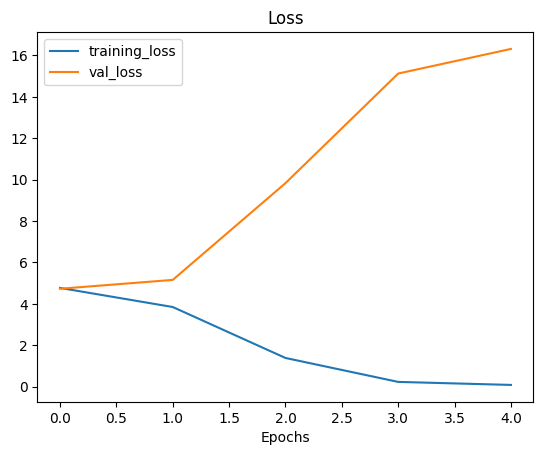

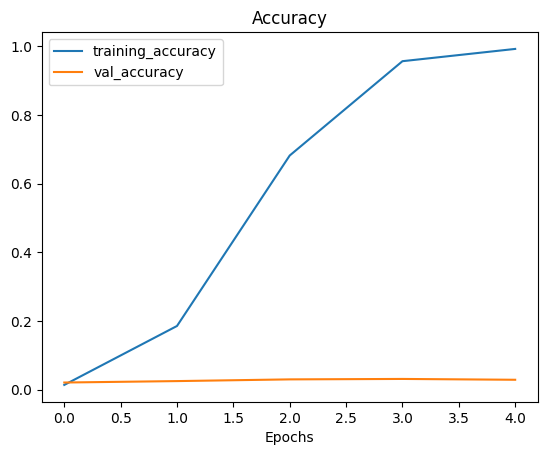

In [17]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(history_1)

# Transfer-Learning

In [18]:
# Create tensorboard callback (functionized because need to create a new one for each model)
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

## PreProcessing Data

In [23]:
# Setup data inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "/content/output/train"
test_dir = "/content/output/test"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

print("Testing images:")
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")

Training images:
Found 14355 images belonging to 120 classes.
Testing images:
Found 6225 images belonging to 120 classes.


## Creating models using Tensorflow Hub

In [19]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

Models used
* Inception V3
* InceptionResNet V2
* NASNET
* PNASNET

In [43]:
# Inception V3 feature vector
Inception_V3_url = "https://tfhub.dev/google/imagenet/inception_v3/feature_vector/5"

# InceptionResNet V2 feature vector
InceptionResNet_V2_url = "https://tfhub.dev/google/imagenet/inception_resnet_v2/classification/5"

#NASNET feature vector
NASNET_url = "https://tfhub.dev/google/imagenet/nasnet_mobile/feature_vector/5"

# PNASNET feature vector
PNASNET_url="https://tfhub.dev/google/imagenet/pnasnet_large/feature_vector/5"


In [21]:
def create_model(model_url, num_classes=10):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer
  ])

  return model

## Inception_V3

In [24]:
# Create model
Inception_model = create_model(Inception_V3_url, num_classes=train_data_10_percent.num_classes)

# Compile model
Inception_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [25]:
# Fit the model
Inception_history = Inception_model.fit(train_data_10_percent,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  # Add TensorBoard callback to model (callbacks parameter takes a list)
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                         experiment_name="resnet50V2")]) # name of log files

Saving TensorBoard log files to: tensorflow_hub/resnet50V2/20230715-035225
Epoch 1/5
449/449 [==============================] - 118s 243ms/step - loss: 1.0928 - accuracy: 0.7241 - val_loss: 0.8810 - val_accuracy: 0.7704
Epoch 2/5
449/449 [==============================] - 102s 228ms/step - loss: 0.5446 - accuracy: 0.8350 - val_loss: 0.8131 - val_accuracy: 0.7806
Epoch 3/5
449/449 [==============================] - 100s 223ms/step - loss: 0.3798 - accuracy: 0.8761 - val_loss: 0.7956 - val_accuracy: 0.7945
Epoch 4/5
449/449 [==============================] - 100s 223ms/step - loss: 0.2809 - accuracy: 0.9039 - val_loss: 0.8475 - val_accuracy: 0.7915
Epoch 5/5
449/449 [==============================] - 101s 225ms/step - loss: 0.2300 - accuracy: 0.9198 - val_loss: 0.8823 - val_accuracy: 0.7891


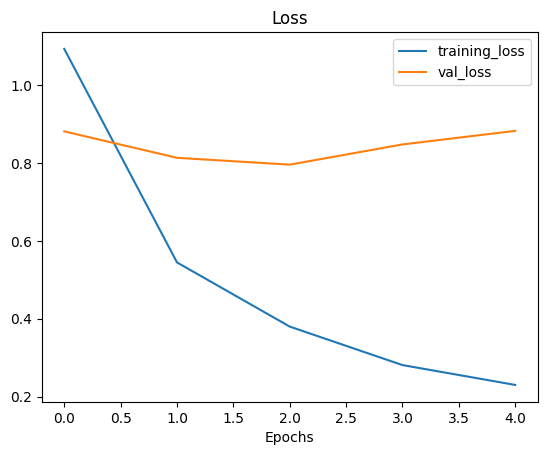

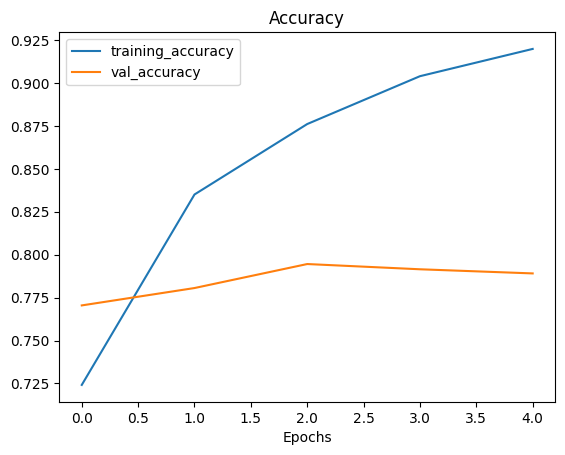

In [26]:
plot_loss_curves(Inception_history)

In [27]:
# Inception summary
Inception_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             21802784  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 120)               245880    
                                                                 
Total params: 22,048,664
Trainable params: 245,880
Non-trainable params: 21,802,784
_________________________________________________________________


## InceptionResNet V2
ResNet V2

In [28]:
# Create model
InceptionResnet_model = create_model(InceptionResNet_V2_url, num_classes=train_data_10_percent.num_classes)

# Compile model
InceptionResnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [29]:
# Fit the model
InceptionResnet_history = InceptionResnet_model.fit(train_data_10_percent,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  # Add TensorBoard callback to model (callbacks parameter takes a list)
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                         experiment_name="Inceptionresnet50V2")]) # name of log files

Saving TensorBoard log files to: tensorflow_hub/Inceptionresnet50V2/20230715-040837
Epoch 1/5
449/449 [==============================] - 151s 298ms/step - loss: 0.8957 - accuracy: 0.7969 - val_loss: 0.7182 - val_accuracy: 0.8307
Epoch 2/5
449/449 [==============================] - 125s 278ms/step - loss: 0.5113 - accuracy: 0.8591 - val_loss: 0.7424 - val_accuracy: 0.8315
Epoch 3/5
449/449 [==============================] - 123s 273ms/step - loss: 0.4163 - accuracy: 0.8784 - val_loss: 0.8266 - val_accuracy: 0.8257
Epoch 4/5
449/449 [==============================] - 124s 277ms/step - loss: 0.3603 - accuracy: 0.8918 - val_loss: 0.8396 - val_accuracy: 0.8212
Epoch 5/5
449/449 [==============================] - 124s 275ms/step - loss: 0.3148 - accuracy: 0.9030 - val_loss: 0.8556 - val_accuracy: 0.8260


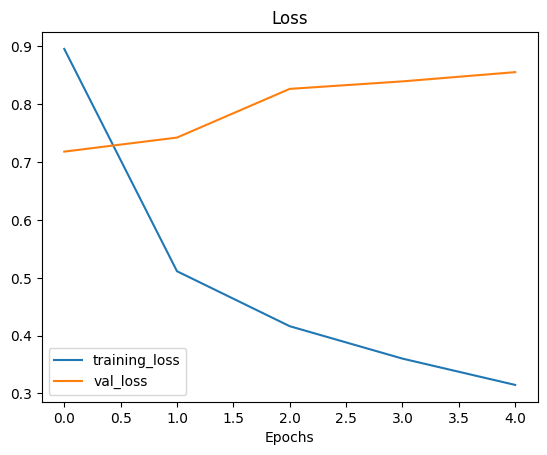

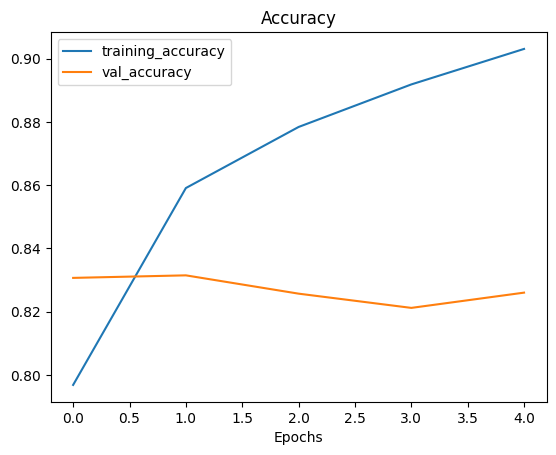

In [30]:
plot_loss_curves(InceptionResnet_history)

In [31]:
# InceptionResnet summary
InceptionResnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1001)             55875273  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 120)               120240    
                                                                 
Total params: 55,995,513
Trainable params: 120,240
Non-trainable params: 55,875,273
_________________________________________________________________


## NASNET

In [32]:
# Create model
NASNET_model = create_model(NASNET_url, num_classes=train_data_10_percent.num_classes)

# Compile model
NASNET_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [33]:
# Fit the model
NASNET_history = NASNET_model.fit(train_data_10_percent,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  # Add TensorBoard callback to model (callbacks parameter takes a list)
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                         experiment_name="NASNET")]) # name of log files

Saving TensorBoard log files to: tensorflow_hub/NASNET/20230715-042250
Epoch 1/5
449/449 [==============================] - 145s 276ms/step - loss: 0.9147 - accuracy: 0.7730 - val_loss: 0.5646 - val_accuracy: 0.8305
Epoch 2/5
449/449 [==============================] - 108s 241ms/step - loss: 0.4520 - accuracy: 0.8538 - val_loss: 0.5747 - val_accuracy: 0.8265
Epoch 3/5
449/449 [==============================] - 102s 227ms/step - loss: 0.3704 - accuracy: 0.8762 - val_loss: 0.5843 - val_accuracy: 0.8217
Epoch 4/5
449/449 [==============================] - 105s 235ms/step - loss: 0.3094 - accuracy: 0.8956 - val_loss: 0.6029 - val_accuracy: 0.8241
Epoch 5/5
449/449 [==============================] - 104s 231ms/step - loss: 0.2645 - accuracy: 0.9117 - val_loss: 0.6190 - val_accuracy: 0.8236


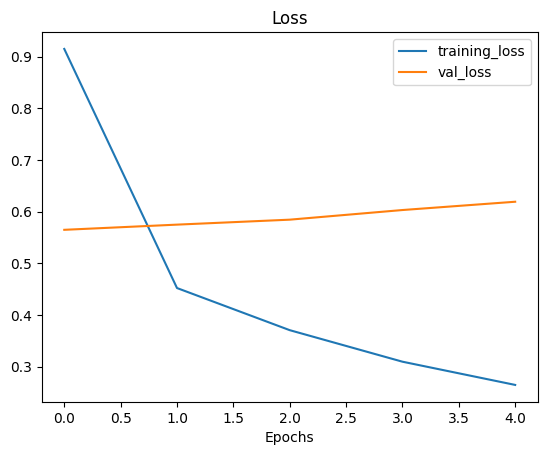

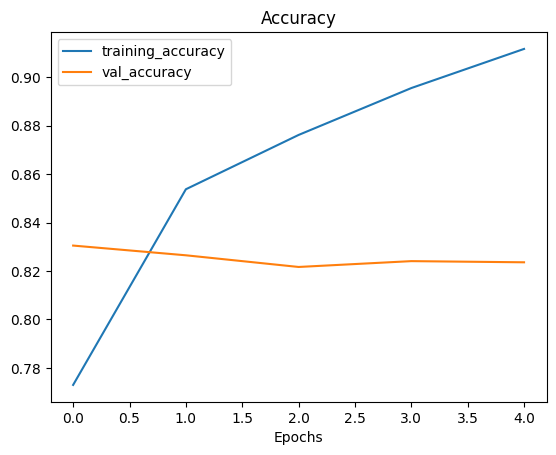

In [34]:
plot_loss_curves(NASNET_history)

In [36]:
# NASNET summary
NASNET_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1056)             4269716   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 120)               126840    
                                                                 
Total params: 4,396,556
Trainable params: 126,840
Non-trainable params: 4,269,716
_________________________________________________________________


## PNASNET
Not compatible

In [45]:
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name "Dog_Breed_Classification" \
  --description "Comparing different models for Stanford_dog_breed's Dataset" \
  --one_shot

2023-07-15 04:50:39.485003: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./tensorflow_hub/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   FPXK-VTNJ



New experiment created. View your TensorBoard at: https://tensorboard.dev/expe

In [46]:
# Link to TensorBoard
# https://tensorboard.dev/experiment/zQvuXKTJSNiM8bSDmjaU7g/#scalars&runSelectionState=eyJJbmNlcHRpb25yZXNuZXQ1MFYyLzIwMjMwNzE1LTA0MDgzNy90cmFpbiI6dHJ1ZSwiSW5jZXB0aW9ucmVzbmV0NTBWMi8yMDIzMDcxNS0wNDA4MzcvdmFsaWRhdGlvbiI6dHJ1ZSwiTkFTTkVULzIwMjMwNzE1LTA0MjI1MC90cmFpbiI6dHJ1ZSwiTkFTTkVULzIwMjMwNzE1LTA0MjI1MC92YWxpZGF0aW9uIjp0cnVlLCJyZXNuZXQ1MFYyLzIwMjMwNzE1LTAzNTIyNS90cmFpbiI6dHJ1ZSwicmVzbmV0NTBWMi8yMDIzMDcxNS0wMzUyMjUvdmFsaWRhdGlvbiI6dHJ1ZX0%3D

# Delete an experiment
# !tensorboard dev delete --experiment_id [INSERT_EXPERIMENT_ID]
# Check to see if experiments still exist
# !tensorboard dev list

# Check Predictions

In [47]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [48]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [49]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['n02085620-Chihuahua' 'n02085782-Japanese_spaniel'
 'n02085936-Maltese_dog' 'n02086079-Pekinese' 'n02086240-Shih-Tzu'
 'n02086646-Blenheim_spaniel' 'n02086910-papillon' 'n02087046-toy_terrier'
 'n02087394-Rhodesian_ridgeback' 'n02088094-Afghan_hound'
 'n02088238-basset' 'n02088364-beagle' 'n02088466-bloodhound'
 'n02088632-bluetick' 'n02089078-black-and-tan_coonhound'
 'n02089867-Walker_hound' 'n02089973-English_foxhound' 'n02090379-redbone'
 'n02090622-borzoi' 'n02090721-Irish_wolfhound'
 'n02091032-Italian_greyhound' 'n02091134-whippet'
 'n02091244-Ibizan_hound' 'n02091467-Norwegian_elkhound'
 'n02091635-otterhound' 'n02091831-Saluki' 'n02092002-Scottish_deerhound'
 'n02092339-Weimaraner' 'n02093256-Staffordshire_bullterrier'
 'n02093428-American_Staffordshire_terrier' 'n02093647-Bedlington_terrier'
 'n02093754-Border_terrier' 'n02093859-Kerry_blue_terrier'
 'n02093991-Irish_terrier' 'n02094114-Norfolk_terrier'
 'n02094258-Norwich_terrier' 'n02094433-Yorkshire_terrier'
 'n02095314-w

1/1 [==============================] - 0s 435ms/step


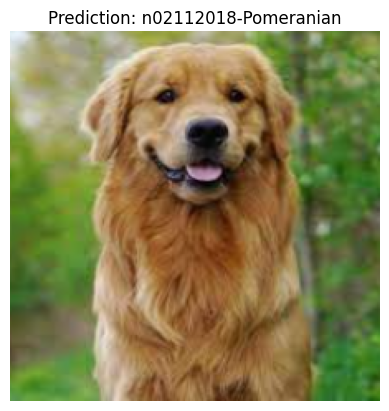

In [51]:
# Make a prediction using Baseline model
pred_and_plot(model=model_1,
              filename="/content/golden_retriever.png",
              class_names=class_names)

1/1 [==============================] - 3s 3s/step


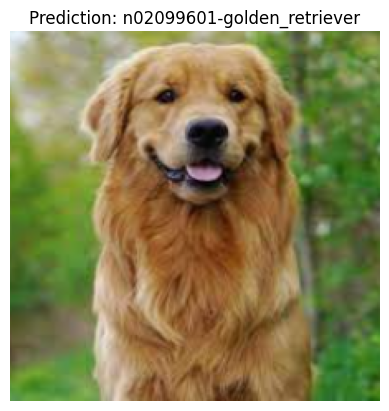

In [52]:
# Make a prediction using Inception V3
pred_and_plot(model=Inception_model,
              filename="/content/golden_retriever.png",
              class_names=class_names)

1/1 [==============================] - 4s 4s/step


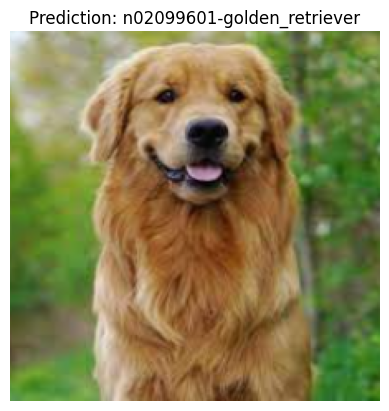

In [53]:
# Make a prediction using InceptionResNet V2
pred_and_plot(model=InceptionResnet_model,
              filename="/content/golden_retriever.png",
              class_names=class_names)

1/1 [==============================] - 3s 3s/step


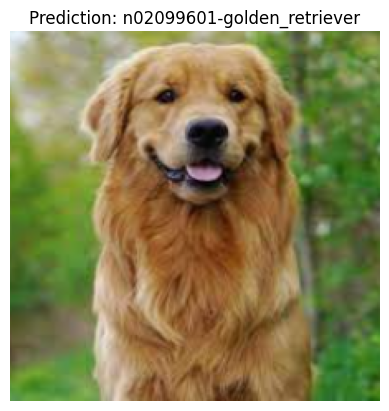

In [54]:
# Make a prediction using NASNET
pred_and_plot(model=NASNET_model,
              filename="/content/golden_retriever.png",
              class_names=class_names)

# Conclusion

ranked best to worst models

[Model Name - Training accuracy , Validation accuracy]
* NASNET - 91.98% , 82.36%
* InceptionResNet V2 - 90.30% , 82.60%
* Inception V3 - 91.98% , 78.9%
* PNASNET - -% , -%

according to article :
The results show that NASNet and PNASNet have better classification accuracy than Inception V3 and InceptionResNet V2 (93.03% and 89.64% VS 84.33% and 85.97% in DataSet1, 93.96% and 89.27% VS 86.25% and 84.13% in DataSet2), and NASNet has the highest accuracy in both datasets.